In [1]:
import torch

In [3]:
x = torch.zeros(5,3).long()
x.dtype

torch.int64

In [7]:
y = torch.rand(5,3)
y

tensor([[0.9404, 0.7484, 0.3353],
        [0.1199, 0.7369, 0.8232],
        [0.2198, 0.0063, 0.9517],
        [0.9265, 0.3285, 0.6358],
        [0.0625, 0.9170, 0.1786]])

In [8]:
x = torch.rand(5,3)
x

tensor([[0.0225, 0.3028, 0.7875],
        [0.6022, 0.3033, 0.9324],
        [0.8449, 0.7006, 0.8537],
        [0.5017, 0.2474, 0.0650],
        [0.3189, 0.4037, 0.4296]])

In [9]:
y.add(x)

tensor([[0.9629, 1.0512, 1.1228],
        [0.7221, 1.0401, 1.7556],
        [1.0647, 0.7069, 1.8054],
        [1.4281, 0.5759, 0.7008],
        [0.3814, 1.3206, 0.6082]])

In [15]:
k = torch.randn(4,4)
print(k)
k2 = k.view(16)
print(k2)

tensor([[ 0.1129, -0.2044,  0.3500, -0.0589],
        [-1.0407,  0.2921,  1.0396, -0.4702],
        [-1.0257, -0.3497, -1.0054,  0.2786],
        [-0.3806,  0.3060, -0.9209, -0.0761]])
tensor([ 0.1129, -0.2044,  0.3500, -0.0589, -1.0407,  0.2921,  1.0396, -0.4702,
        -1.0257, -0.3497, -1.0054,  0.2786, -0.3806,  0.3060, -0.9209, -0.0761])


In [16]:
print(torch.cuda.is_available())

False


# 热身：用numpy实现两层神经网络
----------------------

### 一个全链接ReLU神经网络，一个隐含层，没有bias。用来从x预测y，使用L2 Loss.


- $h = w_1x$
- $a = max(0,h)$
- $\hat y = w_2a$


- $h = w_1x + b_1$
- $a = max(0,h)$
- $\hat y = w_2a + b_2$


- $y = ax + b$
- $\frac{\partial y}{\partial x} = a$
- $\frac{\partial y}{\partial a} = x$


### 这一实现完全使用numpy
- forward pass
- loss
- backward pass

0 25935131.486308113
1 18486821.87762563
2 15818831.08835511
3 14892263.00709353
4 14283260.253362712
5 13287647.455910152
6 11586146.941474184
7 9401588.616842337
8 7111471.389346401
9 5104645.3925905395
10 3547250.597204901
11 2438029.599306607
12 1687387.707896554
13 1192281.8812988554
14 867758.0464000907
15 652987.5190790306
16 508156.92768665904
17 407706.25351384573
18 335743.5643253821
19 282388.74834659736
20 241557.81025463896
21 209343.93214542983
22 183282.03116138768
23 161759.5456775013
24 143665.71006567255
25 128234.53833443802
26 114933.31035365394
27 103362.42533371
28 93237.74787140379
29 84324.77510452218
30 76445.1440179084
31 69461.43601579756
32 63233.48574644989
33 57662.17855273835
34 52666.102556693906
35 48180.279022340925
36 44145.25486425277
37 40499.69459403906
38 37203.22970468036
39 34215.10809636711
40 31501.032286081077
41 29032.74534261092
42 26785.255197312432
43 24734.95164328992
44 22862.330677398048
45 21150.303791840244
46 19583.130764058922
47 1

442 0.00020805100747259725
443 0.0002000317999251943
444 0.00019232135961327152
445 0.00018491689062444217
446 0.00017779493767241617
447 0.00017094727596793268
448 0.0001643641454161804
449 0.00015803568053390806
450 0.00015195460932386967
451 0.0001461069789481131
452 0.0001404855576430145
453 0.00013508154331276324
454 0.00012988650432074625
455 0.00012489229739670593
456 0.000120090466857198
457 0.00011547538839891004
458 0.00011103762358739215
459 0.00010677148314372605
460 0.00010267041051432024
461 9.872786141768239e-05
462 9.493702334739015e-05
463 9.129214763476751e-05
464 8.77921904487434e-05
465 8.44232068002127e-05
466 8.118384801554152e-05
467 7.806978728579184e-05
468 7.507570894577674e-05
469 7.21970783054361e-05
470 6.942888958046664e-05
471 6.676829309444526e-05
472 6.42094233578366e-05
473 6.174894447567424e-05
474 5.938339898921154e-05
475 5.710884428471828e-05
476 5.492183301655683e-05
477 5.281866158745725e-05
478 5.079684629391721e-05
479 4.885264582090925e-05
480

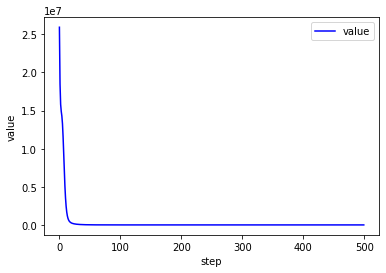

In [117]:
import numpy as np
from matplotlib import pyplot as plt

def plot_curve(data):
  fig = plt.figure()
  plt.plot(range(len(data)), data, color = 'blue')
  plt.legend(['value'], loc = 'upper right')
  plt.xlabel('step')
  plt.ylabel('value')
  plt.show()


N, D_in, H, D_out = 64, 1000, 100, 10

#随机创建一些训练数据
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6

train_loss = []

for iter in range(500):
    # Forward pass
    h = x.dot(w1) # N * H
    h_relu = np.maximum(h, 0) # N * H
    y_pred = h_relu.dot(w2) # N * D_out
    
    # compute loss
    loss = np.square(y_pred - y).sum()
    print(iter, loss)
    
    train_loss.append(loss.item())
    
    # Backward pass
    # Compute the gradient
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # update weights of w1 and w2
    w1 = w1 - learning_rate * grad_w1
    w2 = w2 - learning_rate * grad_w2

plot_curve(train_loss)

In [116]:
import numpy as np

N, D_in, H, D_out = 1, 10, 5, 2

x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

h = x.dot(w1)
# print(x)
# print(w)
# print(h)
print(x.shape, w.shape, h.shape)
h_relu = np.maximum(h,0)
y_pred = h_relu.dot(w2)

print(y)
print(y_pred)

loss = np.square(y_pred - y).sum()
print(loss)

print(np.square(y_pred - y))


(1, 10) (10, 5) (1, 5)
[[-2.94938197 -1.05962678]]
[[ 3.08185656 -3.23880654]]
41.12466259496772
[[36.3758382  4.7488244]]


In [28]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H)
w2 = torch.randn(H, D_out)

learning_rate = 1e-6

for iter in range(500):
    # Forward pass
    h = x.mm(w1) # N * H
    h_relu = h.clamp(min=0) # N * H
    y_pred = h_relu.mm(w2) # N * D_out
    
    # compute loss
    loss = (y_pred - y).pow(2).sum().item()
    print(iter, loss)
    
    # Backward pass
    # Compute the gradient
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # update weights of w1 and w2
    w1 = w1 - learning_rate * grad_w1
    w2 = w2 - learning_rate * grad_w2


0 33010666.0
1 33201632.0
2 37032120.0
3 37212272.0
4 29541658.0
5 17826030.0
6 8739726.0
7 4111791.25
8 2182345.0
9 1388616.875
10 1019321.1875
11 811715.125
12 673368.125
13 569943.125
14 488005.34375
15 421033.8125
16 365543.53125
17 318899.625
18 279374.125
19 245679.90625
20 216841.53125
21 191998.625
22 170518.953125
23 151859.859375
24 135594.015625
25 121350.390625
26 108854.765625
27 97842.5078125
28 88113.3671875
29 79492.171875
30 71841.578125
31 65025.69921875
32 58943.87109375
33 53505.96484375
34 48635.2421875
35 44260.82421875
36 40327.6640625
37 36789.828125
38 33600.4765625
39 30721.00390625
40 28114.3671875
41 25752.73828125
42 23611.173828125
43 21666.427734375
44 19899.3203125
45 18290.83203125
46 16824.3359375
47 15487.34375
48 14266.791015625
49 13149.9140625
50 12127.8681640625
51 11192.1630859375
52 10334.7998046875
53 9549.197265625
54 8827.9365234375
55 8165.3642578125
56 7556.32470703125
57 6996.119140625
58 6480.25732421875
59 6005.25439453125
60 5567.513671

In [32]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

y = w*x+b # y = 2 * 1 + 3
y.backward()
# dy / dw = x
print(w.grad)
print(x.grad)
print(b.grad)


tensor(1.)
tensor(2.)
tensor(1.)


In [ ]:
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

learning_rate = 1e-6

for iter in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
        
    # compute loss
    loss = (y_pred - y).pow(2).sum() # computation graph
    print(iter, loss.item())
    
    # Backward pass
    loss.backward()
    
    # update weights of w1 and w2
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()


In [60]:
# x = torch.randn(N, D_in)
# y = torch.randn(N, D_out)

# w1 = torch.randn(D_in, H, requires_grad=True)
# w2 = torch.randn(H, D_out, requires_grad=True)

y_pred = x.mm(w1).clamp(min=0).mm(w2)

# compute loss
loss = (y_pred - y).pow(2).sum() # computation graph

# Backward pass
w1.grad.zero_()
w2.grad.zero_()
loss.backward()

print(w1.grad)
print(w2.grad)

tensor([[ 12481.1494,  -6078.5254, -16486.4863,  ...,  13027.5576,
          -8964.2461, -18386.7031],
        [ -7538.8501,  -4911.2056,  -5580.1245,  ...,   6364.8765,
           7334.2515,   6459.0625],
        [-10097.7520,   2466.7603,   -152.5329,  ...,   4360.7661,
           8486.4443,   -736.1343],
        ...,
        [ -5857.1279,  -6948.6475,  -4686.9497,  ...,  14931.3145,
          -7596.8306,   6547.0762],
        [ -7371.1470, -10042.2520,  -9772.3320,  ...,  14430.2910,
          -9075.7432,  -8404.2217],
        [ -4398.2217,  -5213.1768, -10199.9893,  ...,    704.4414,
          -2803.5264,   4363.0366]])
tensor([[-1.5581e+04, -3.1343e+04, -2.3171e+04, -4.4591e+05,  1.2535e+05,
         -8.0338e+03, -1.1181e+05,  2.8903e+05,  1.6783e+05, -3.0842e+05],
        [ 1.5871e+05,  6.6141e+04,  8.7443e+04, -5.9724e+05,  2.6138e+05,
         -5.5446e+03, -1.6543e+05,  1.8657e+05,  3.2884e+05, -1.4094e+05],
        [ 1.2192e+05,  7.2953e+04,  4.1978e+04, -5.3113e+05,  1.5583e+

In [74]:
import torch.nn as nn

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H, bias=False), #w_1 * x + b_1 or bias=false
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out, bias=False),
)

torch.nn.init.normal_(model[0].weight)
torch.nn.init.normal_(model[2].weight)

loss_fn = nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for iter in range(500):
    # Forward pass
    y_pred = model(x) # modle forward pass
        
    # compute loss
    loss = loss_fn(y_pred, y)
    print(iter, loss.item())
        
    # Backward pass
    loss.backward()
    
    # update weights of w1 and w2
    with torch.no_grad():
        for param in model.parameters(): # param (tensor, grad)
            param -= learning_rate * param.grad
    
    model.zero_grad()


0 44296256.0
1 44724908.0
2 44275256.0
3 35338420.0
4 21389122.0
5 10327392.0
6 4871025.5
7 2653259.25
8 1743069.875
9 1298596.125
10 1031429.0
11 844707.75
12 703046.375
13 591330.75
14 500993.21875
15 427218.03125
16 366359.125
17 315804.125
18 273507.625
19 237890.015625
20 207760.953125
21 182188.3125
22 160326.0
23 141511.796875
24 125266.296875
25 111134.109375
26 98832.921875
27 88110.328125
28 78712.5546875
29 70466.4140625
30 63210.4921875
31 56803.53515625
32 51136.1015625
33 46120.34765625
34 41663.08203125
35 37692.484375
36 34151.4140625
37 30986.181640625
38 28148.17578125
39 25599.779296875
40 23305.146484375
41 21238.0859375
42 19374.5859375
43 17690.38671875
44 16167.38671875
45 14787.3251953125
46 13536.001953125
47 12397.8701171875
48 11363.609375
49 10423.0927734375
50 9566.30859375
51 8785.599609375
52 8074.03662109375
53 7424.1689453125
54 6830.35302734375
55 6287.32861328125
56 5790.62890625
57 5335.73828125
58 4919.3330078125
59 4537.78173828125
60 4187.59277343

411 4.2233554268023e-05
412 4.139388329349458e-05
413 4.092215749551542e-05
414 4.041009015054442e-05
415 3.9739439671393484e-05
416 3.923260373994708e-05
417 3.871882290695794e-05
418 3.796206146944314e-05
419 3.747774098883383e-05
420 3.6868019378744066e-05
421 3.642291994765401e-05
422 3.5934135667048395e-05
423 3.527521766955033e-05
424 3.483366526779719e-05
425 3.449250289122574e-05
426 3.3927779441000894e-05
427 3.3376294595655054e-05
428 3.299917443655431e-05
429 3.242460297769867e-05
430 3.214917524019256e-05
431 3.169738192809746e-05
432 3.123659553239122e-05
433 3.0767965654376894e-05
434 3.032565837202128e-05
435 2.9841505238437094e-05
436 2.9705077395192347e-05
437 2.9202352379797958e-05
438 2.8716727683786303e-05
439 2.8456390282372013e-05
440 2.805700023600366e-05
441 2.7862635761266574e-05
442 2.735934867814649e-05
443 2.7070072974311188e-05
444 2.6740779503597878e-05
445 2.636197314132005e-05
446 2.6100529794348404e-05
447 2.5838300643954426e-05
448 2.5558038032613695e-

In [72]:
model[0].weight

Parameter containing:
tensor([[-0.0082, -0.0237, -0.0254,  ...,  0.0199, -0.0113, -0.0192],
        [-0.0092, -0.0308, -0.0099,  ...,  0.0277,  0.0174,  0.0275],
        [ 0.0068,  0.0206,  0.0271,  ...,  0.0196,  0.0300, -0.0031],
        ...,
        [ 0.0192, -0.0070,  0.0126,  ..., -0.0163,  0.0055,  0.0036],
        [ 0.0067,  0.0052, -0.0261,  ...,  0.0105,  0.0142, -0.0162],
        [-0.0295,  0.0110,  0.0029,  ...,  0.0236,  0.0080, -0.0078]],
       requires_grad=True)

In [85]:
import torch.nn as nn

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H, bias=False), #w_1 * x + b_1 or bias=false
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out, bias=False),
)

# torch.nn.init.normal_(model[0].weight)
# torch.nn.init.normal_(model[2].weight)
# learning_rate = 1e-6
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss(reduction='sum')

for iter in range(500):
    # Forward pass
    y_pred = model(x) # modle forward pass
        
    # compute loss
    loss = loss_fn(y_pred, y)
    print(iter, loss.item())
        
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    
    # update weights of w1 and w2
    optimizer.step()


0 684.6771240234375
1 667.0467529296875
2 649.8901977539062
3 633.1981201171875
4 616.9788208007812
5 601.1324462890625
6 585.7523193359375
7 570.822021484375
8 556.3409423828125
9 542.3056030273438
10 528.7654418945312
11 515.5872192382812
12 502.7699279785156
13 490.2771301269531
14 478.1654052734375
15 466.3743896484375
16 454.86187744140625
17 443.6695556640625
18 432.783935546875
19 422.2423400878906
20 412.09149169921875
21 402.205322265625
22 392.5624694824219
23 383.19342041015625
24 374.0543518066406
25 365.12689208984375
26 356.48779296875
27 348.04644775390625
28 339.84063720703125
29 331.8714294433594
30 324.1247863769531
31 316.54620361328125
32 309.14337158203125
33 301.90447998046875
34 294.84332275390625
35 287.96722412109375
36 281.239501953125
37 274.6675720214844
38 268.2334899902344
39 261.96319580078125
40 255.82418823242188
41 249.82620239257812
42 243.97244262695312
43 238.24717712402344
44 232.63587951660156
45 227.15736389160156
46 221.80914306640625
47 216.592

476 0.0004762541502714157
477 0.00045854930067434907
478 0.0004414751601871103
479 0.00042500969721004367
480 0.00040913038537837565
481 0.00039381542592309415
482 0.0003790450282394886
483 0.0003648082201834768
484 0.0003510886162985116
485 0.00033785501727834344
486 0.00032510171877220273
487 0.00031280473922379315
488 0.00030095333931967616
489 0.0002895310171879828
490 0.00027852426865138113
491 0.00026791865820996463
492 0.00025770303909666836
493 0.00024785418645478785
494 0.00023837009212002158
495 0.00022923694632481784
496 0.00022042603814043105
497 0.00021194672444835305
498 0.0002037778467638418
499 0.00019591538875829428


In [87]:
import torch.nn as nn

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.fc1 = torch.nn.Linear(D_in, H, bias=False)
        self.fc2 = torch.nn.Linear(H, D_out, bias=False)
        
    def forward(self, x):
        y_pred = self.fc2(self.fc1(x).clamp(min=0))
        return y_pred

model = TwoLayerNet(D_in, H, D_out)
loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for iter in range(500):
    # Forward pass
    y_pred = model(x) # modle forward pass
        
    # compute loss
    loss = loss_fn(y_pred, y)
    print(iter, loss.item())
        
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    
    # update weights of w1 and w2
    optimizer.step()


0 702.4593505859375
1 684.839599609375
2 667.6109008789062
3 650.8936767578125
4 634.6084594726562
5 618.8322143554688
6 603.5379028320312
7 588.8011474609375
8 574.4949951171875
9 560.5242309570312
10 546.9115600585938
11 533.6917724609375
12 520.8302612304688
13 508.40869140625
14 496.3638610839844
15 484.72528076171875
16 473.436767578125
17 462.4193115234375
18 451.7100830078125
19 441.31634521484375
20 431.24786376953125
21 421.45416259765625
22 411.9308776855469
23 402.6516418457031
24 393.587646484375
25 384.76226806640625
26 376.1805419921875
27 367.802001953125
28 359.59466552734375
29 351.6164245605469
30 343.8407287597656
31 336.2412414550781
32 328.79693603515625
33 321.5121154785156
34 314.3683776855469
35 307.3686828613281
36 300.5021667480469
37 293.7964172363281
38 287.219482421875
39 280.77899169921875
40 274.4537048339844
41 268.2597351074219
42 262.17718505859375
43 256.20941162109375
44 250.36715698242188
45 244.66436767578125
46 239.09872436523438
47 233.6486358642

474 1.0134715921594761e-05
475 9.730612873681821e-06
476 9.340944416180719e-06
477 8.96718574949773e-06
478 8.606688425061293e-06
479 8.260889444500208e-06
480 7.928761988296174e-06
481 7.608366104250308e-06
482 7.301900041056797e-06
483 7.005133738857694e-06
484 6.72126361678238e-06
485 6.448929525504354e-06
486 6.186024620546959e-06
487 5.935117314948002e-06
488 5.691777914762497e-06
489 5.459703061205801e-06
490 5.235860953689553e-06
491 5.020602202421287e-06
492 4.81406368635362e-06
493 4.616117166733602e-06
494 4.4256184992264025e-06
495 4.243048351781908e-06
496 4.068101588927675e-06
497 3.89881734008668e-06
498 3.7373856685007922e-06
499 3.5819548429572023e-06


In [192]:
x = torch.randn(2, 2)
y = torch.randn(2, 2)

w = torch.randn(2, 2, requires_grad=True)

# print(x)
# print(w)

y_pred = x.mm(w)
loss = (y_pred - y).sum()

loss.backward()

grad_y_pred = y_pred / y_pred
w_grad = x.t().mm(grad_y_pred)

print(w.grad)
print(w_grad)

tensor([[-0.6896, -0.6896],
        [ 0.4170,  0.4170]])
tensor([[-0.6896, -0.6896],
        [ 0.4170,  0.4170]], grad_fn=<MmBackward>)


In [186]:
N, D_in, H, D_out = 1, 10, 5, 2

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

learning_rate = 1e-6

for iter in range(1):
    # Forward pass
    h = x.mm(w1) # N * H
    h_relu = h.clamp(min=0) # N * H
    y_pred = h_relu.mm(w2) # N * D_out
    
    # compute loss
    loss = (y_pred - y).pow(2).sum()
    print(iter, loss.item())
    
    loss.backward()
    
    # Backward pass
    # Compute the gradient
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    print(w1.grad)
    print(grad_w1)

    # update weights of w1 and w2
    w1 = w1 - learning_rate * grad_w1
    w2 = w2 - learning_rate * grad_w2

0 159.17657470703125
tensor([[  0.1794,   0.0000,   0.0000,  -0.0000,  10.8707],
        [  0.5025,   0.0000,   0.0000,  -0.0000,  30.4529],
        [  0.2255,   0.0000,   0.0000,  -0.0000,  13.6651],
        [ -1.0068,  -0.0000,  -0.0000,   0.0000, -61.0109],
        [  1.5500,   0.0000,   0.0000,  -0.0000,  93.9285],
        [  1.2936,   0.0000,   0.0000,  -0.0000,  78.3854],
        [  1.7087,   0.0000,   0.0000,  -0.0000, 103.5402],
        [  0.2558,   0.0000,   0.0000,  -0.0000,  15.5030],
        [ -1.1310,  -0.0000,  -0.0000,   0.0000, -68.5375],
        [  1.5112,   0.0000,   0.0000,  -0.0000,  91.5771]])
tensor([[  0.1794,   0.0000,   0.0000,   0.0000,  10.8707],
        [  0.5025,   0.0000,   0.0000,   0.0000,  30.4529],
        [  0.2255,   0.0000,   0.0000,   0.0000,  13.6651],
        [ -1.0068,  -0.0000,  -0.0000,  -0.0000, -61.0109],
        [  1.5500,   0.0000,   0.0000,   0.0000,  93.9285],
        [  1.2936,   0.0000,   0.0000,   0.0000,  78.3854],
        [  1.7087,